# Task 2 

## Credit / Home Loans - AutoML vs Bespoke ML

Standard Bank is embracing the digital transformation wave and intends to use new and exciting technologies to give their customers a complete set of services from the convenience of their mobile devices.
As Africa’s biggest lender by assets, the bank aims to improve the current process in which potential borrowers apply for a home loan. The current process involves loan officers having to manually process home loan applications. This process takes 2 to 3 days to process upon which the applicant will receive communication on whether or not they have been granted the loan for the requested amount.
To improve the process Standard Bank wants to make use of machine learning to assess the credit worthiness of an applicant by implementing a model that will predict if the potential borrower will default on his/her loan or not, and do this such that the applicant receives a response immediately after completing their application. 

You will be required to follow the data science lifecycle to fulfill the objective. The data science lifecycle (https://www.datascience-pm.com/crisp-dm-2/) includes:

- Business Understanding
- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment.

You now know the CRoss Industry Standard Process for Data Mining (CRISP-DM), have an idea of the business needs and objectivess, and understand the data. Next is the tedious task of preparing the data for modeling, modeling and evaluating the model. Luckily, just like EDA the first of the two phases can be automated. But also, just like EDA this is not always best. 


In this task you will be get a taste of AutoML and Bespoke ML. In the notebook we make use of the library auto-sklearn/autosklearn (https://www.automl.org/automl/auto-sklearn/) for AutoML and sklearn for ML. We will use train one machine for the traditional approach and you will be required to change this model to any of the models that exist in sklearn. The model we will train will be a Logistic Regression. Parts of the data preparation will be omitted for you to do, but we will provide hints to lead you in the right direction.

The data provided can be found in the Resources folder as well as (https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset).

- train will serve as the historical dataset that the model will be trained on and,
- test will serve as unseen data we will predict on, i.e. new ('future') applicants.

### Part One

There are many AutoEDA Python libraries out there which include:

- dtale (https://dtale.readthedocs.io/en/latest/)
- pandas profiling (https://pandas-profiling.ydata.ai/docs/master/index.html)
- autoviz (https://readthedocs.org/projects/autoviz/)
- sweetviz (https://pypi.org/project/sweetviz/)

and many more. In this task we will use Sweetviz.. You may be required to use bespoke EDA methods.

The Home Loans Department manager wants to know the following:

1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

3. How do the the loan statuses compare? i.e. what is the distrubition of each?

4. How do women and men compare when it comes to defaulting on loans in the historical dataset?

5. How many of the loan applicants have dependents based on the historical dataset?

6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset? 

7. Are applicants with a credit history more likely to default than those who do not have one?

8. Is there a correlation between the applicant's income and the loan amount they applied for? 

### Part Two

Run the AutoML section and then fill in code for the traditional ML section for the the omitted cells.

Please note that the notebook you submit must include the analysis you did in Task 2.













## Import Libraries




In [1]:
!pip install sweetviz 
#uncomment the above if you need to install the library 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install autosklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement autosklearn (from versions: none)
ERROR: No matching distribution found for autosklearn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

## Import Datasets

In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Part One

## EDA

In [5]:
train_data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
# we concat for easy analysis
n = train_data.shape[0] # we set this to be able to separate the
df = pd.concat([train_data, test_data], axis=0)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
print(df)

      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001002   Male      No          0      Graduate            No   
1    LP001003   Male     Yes          1      Graduate            No   
2    LP001005   Male     Yes          0      Graduate           Yes   
3    LP001006   Male     Yes          0  Not Graduate            No   
4    LP001008   Male      No          0      Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1

### Sweetviz

                                             |          | [  0%]   00:00 -> (? left)


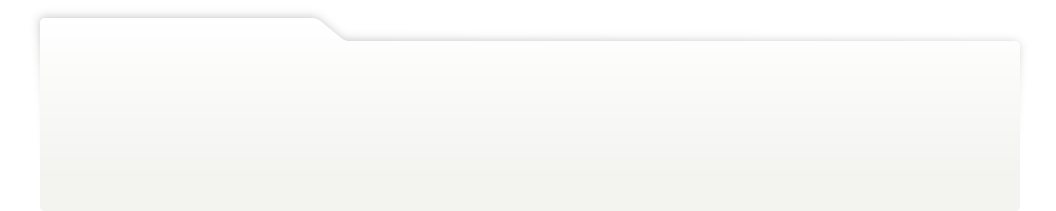
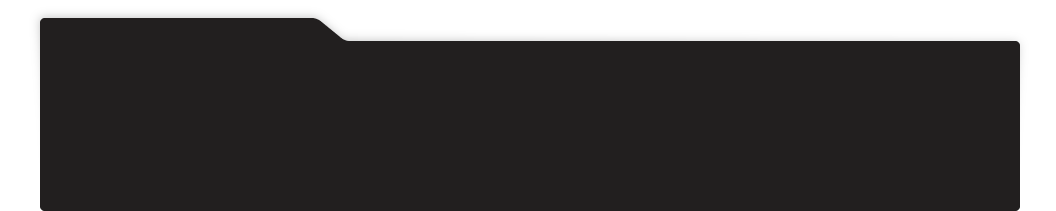
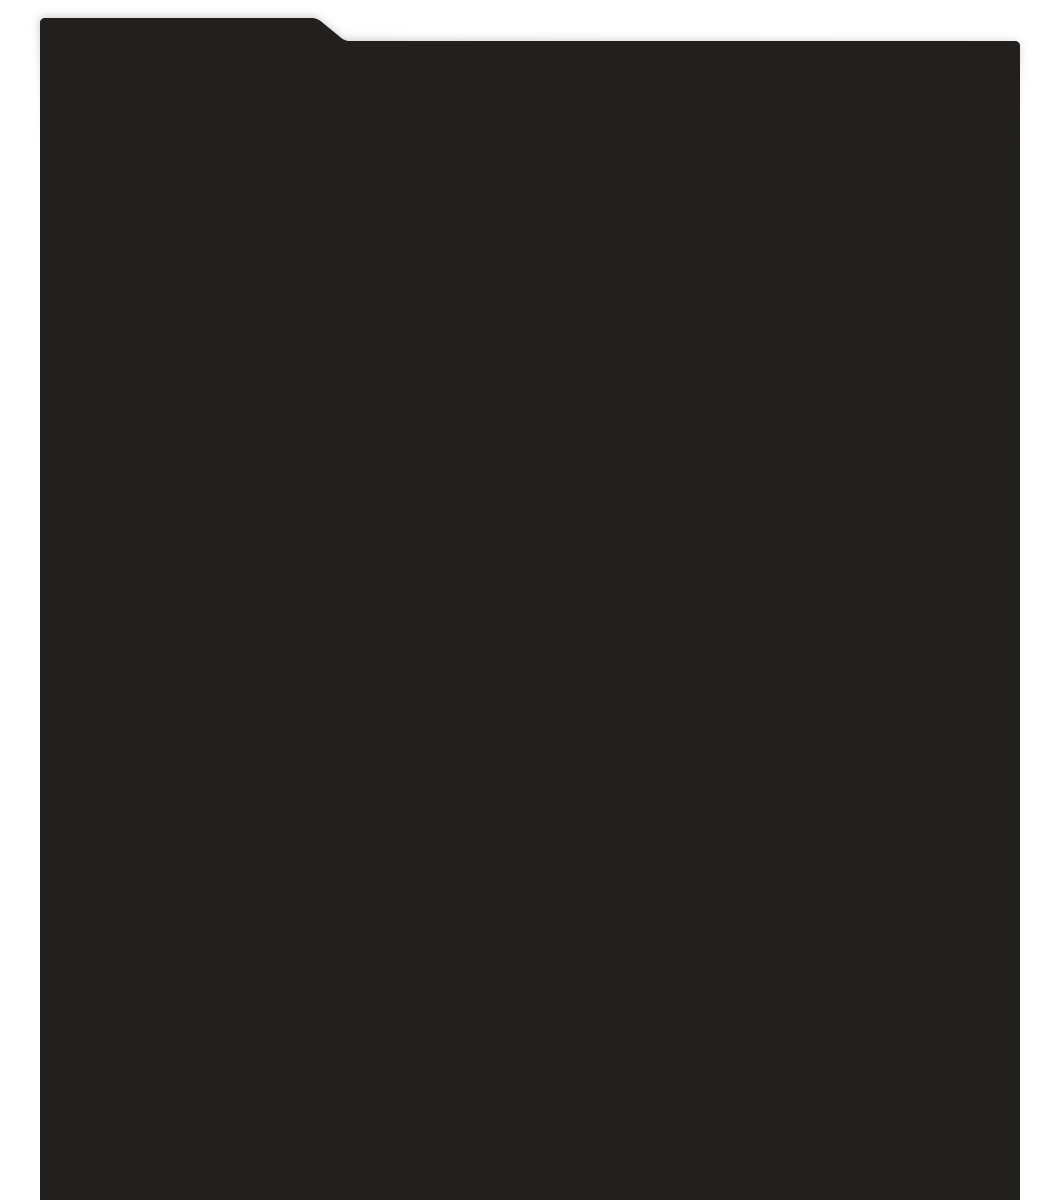
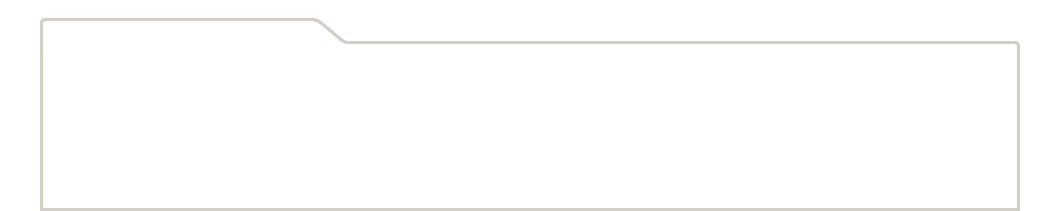
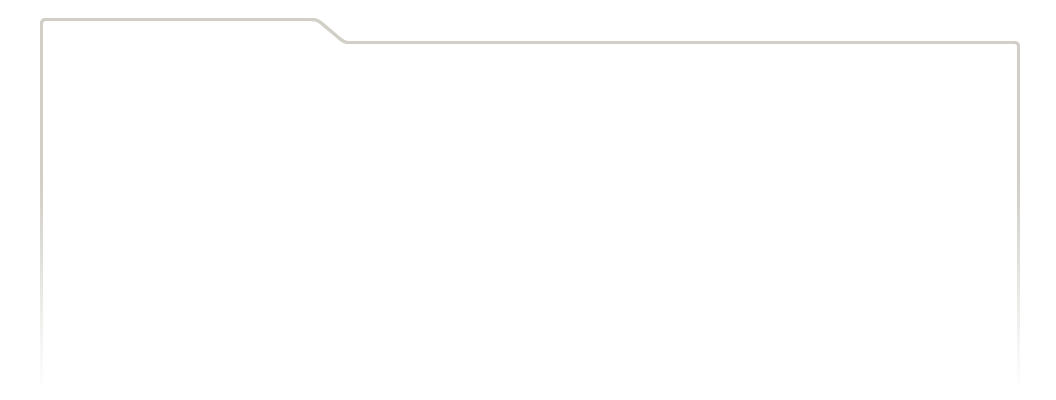
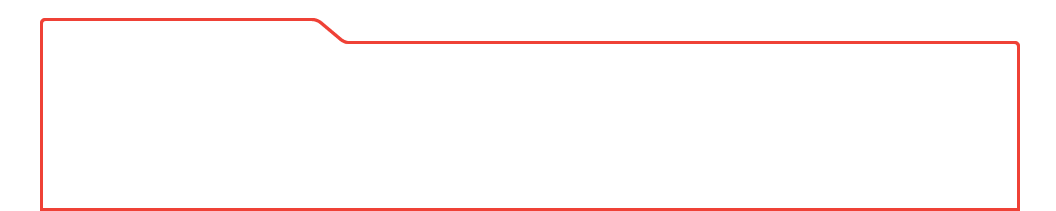
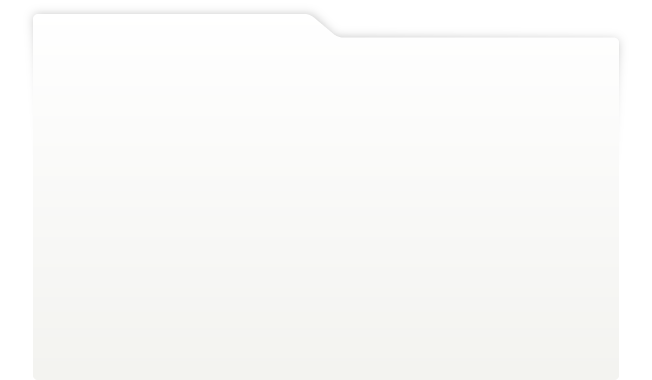
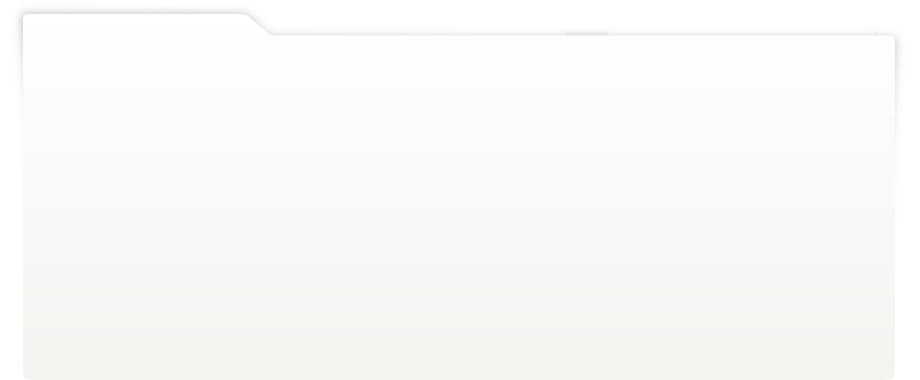
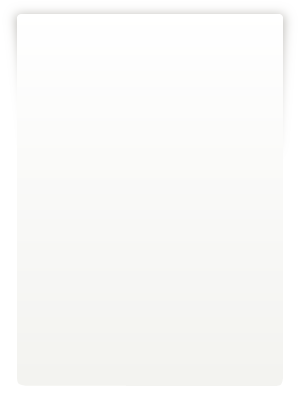
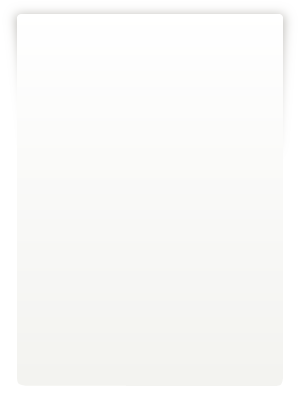
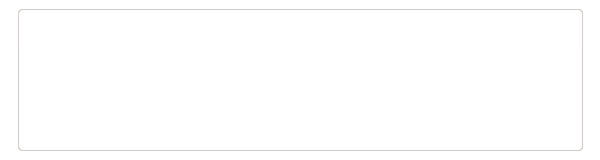
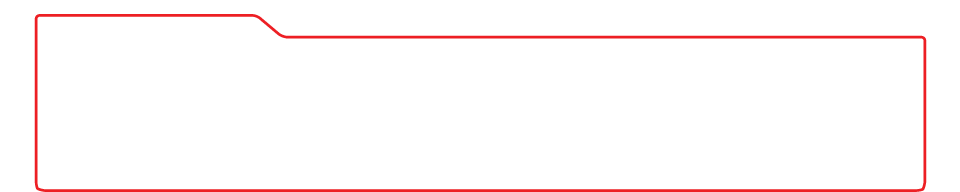
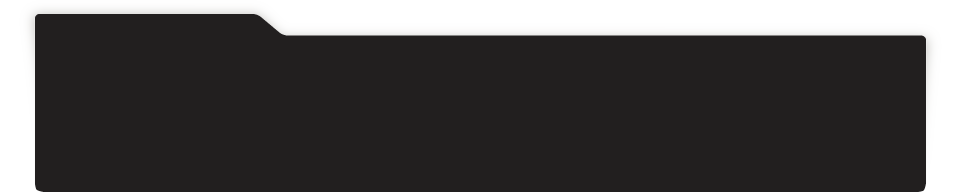
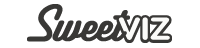
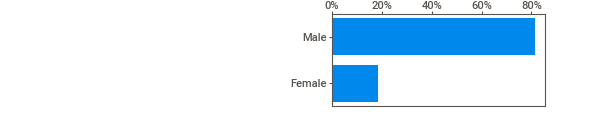
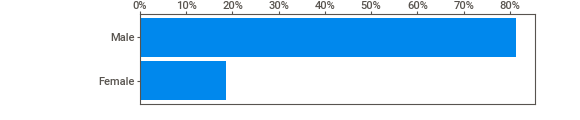
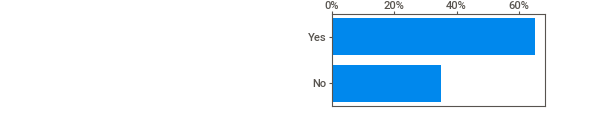
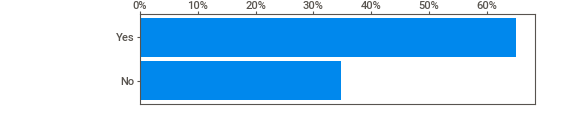
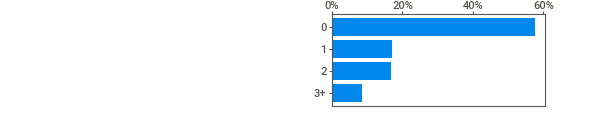
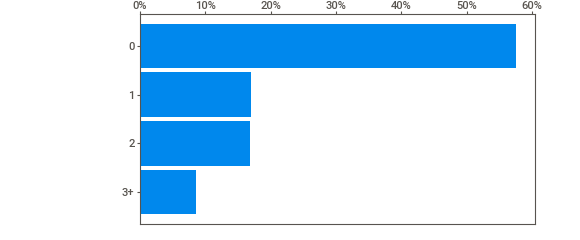
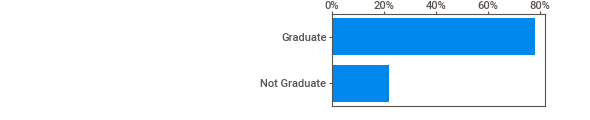
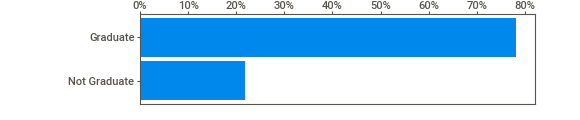
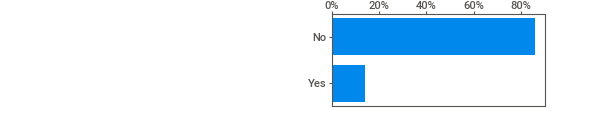
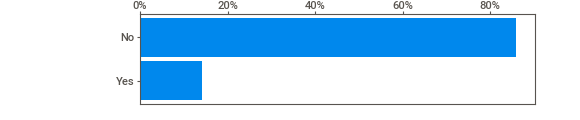
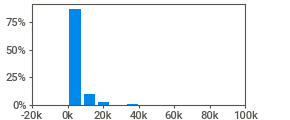
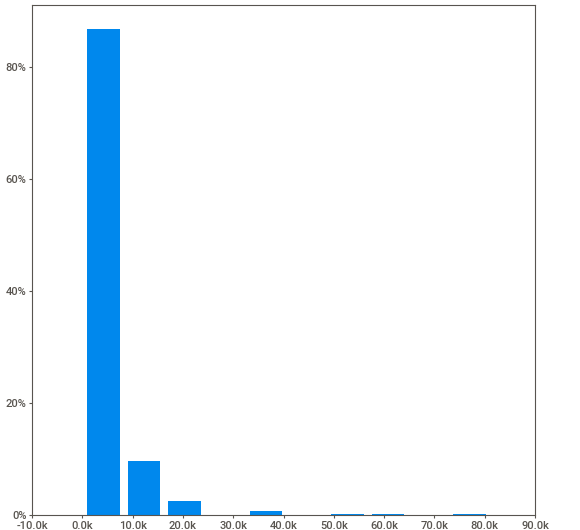
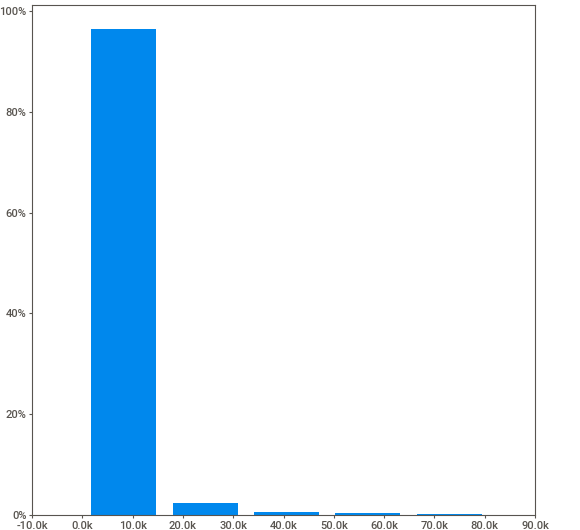
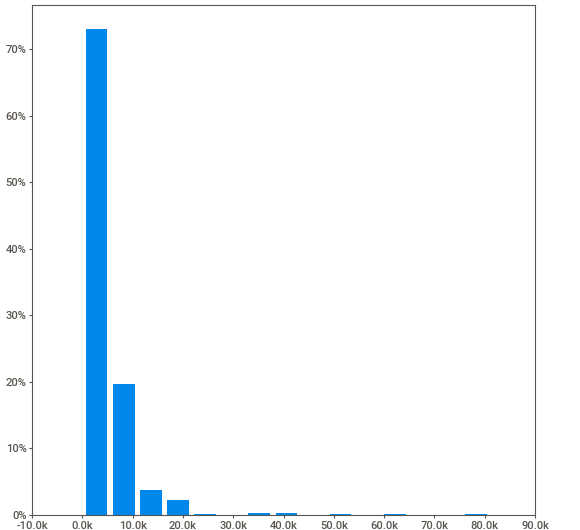
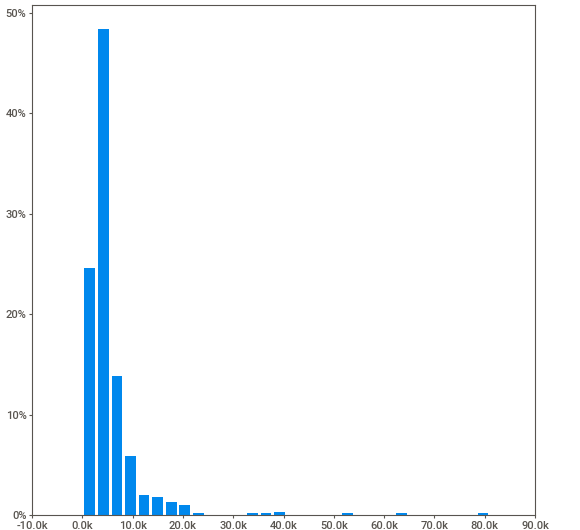
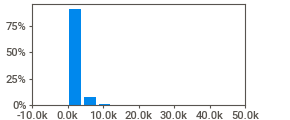
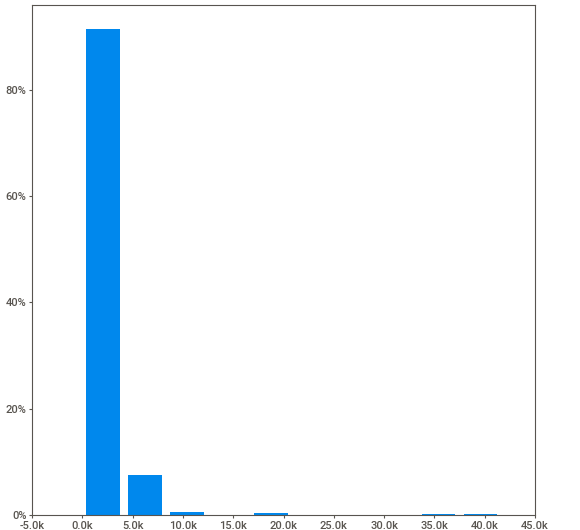
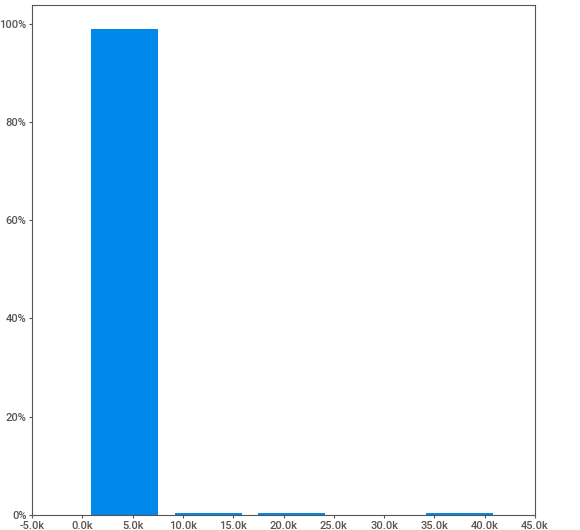
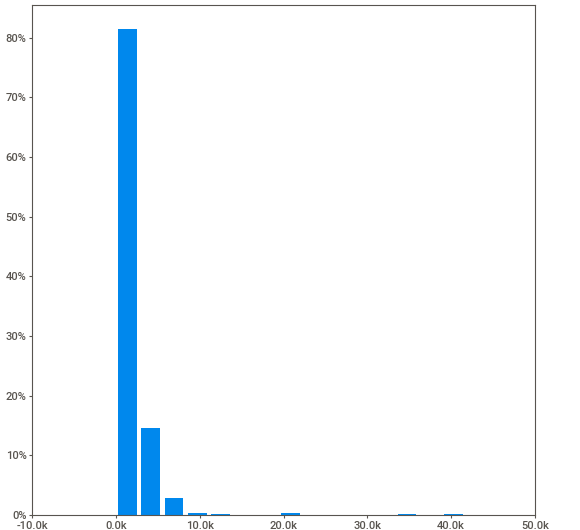
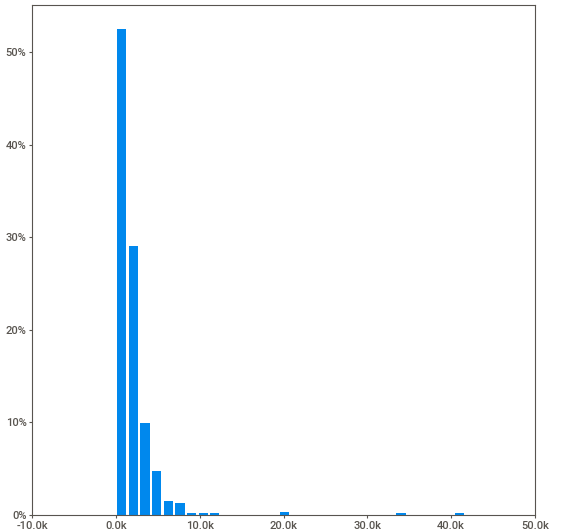
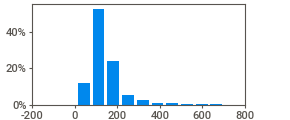
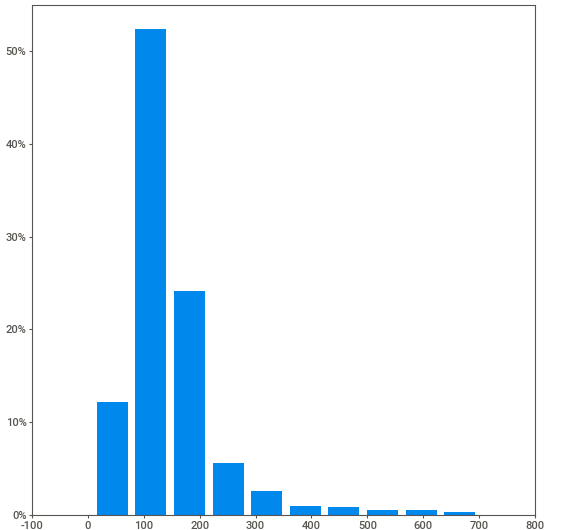
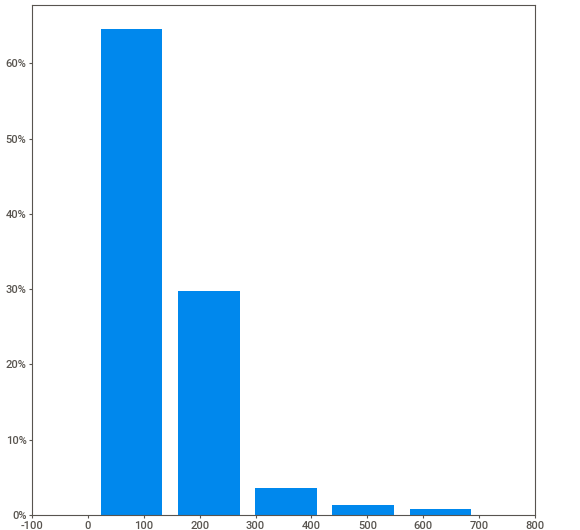
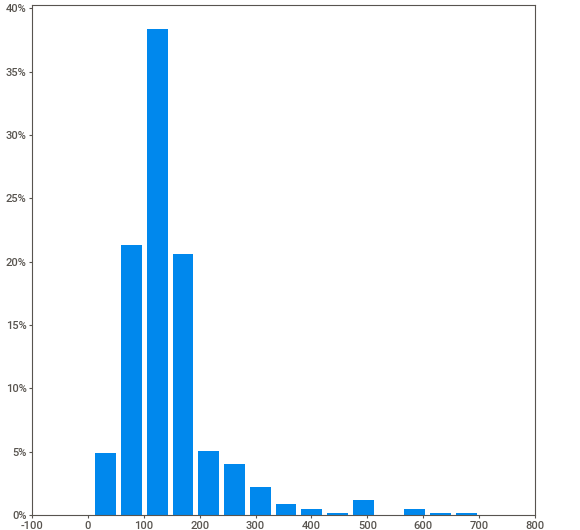
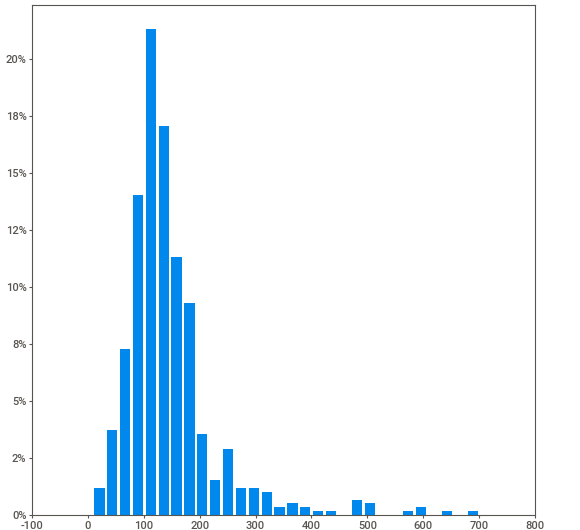
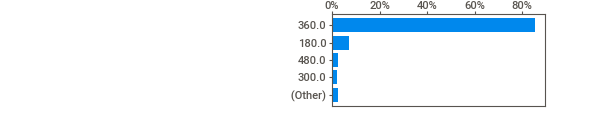
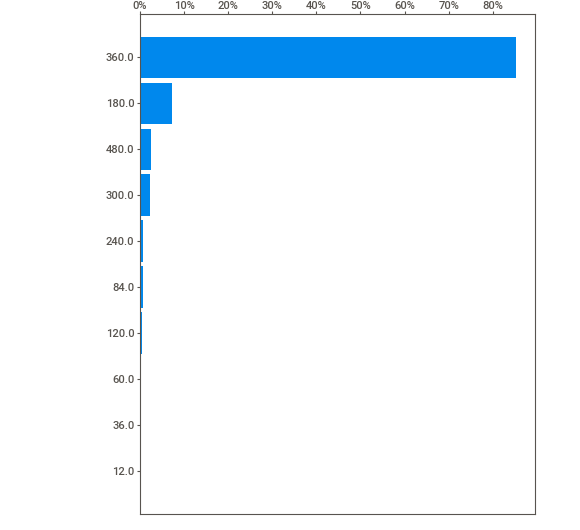
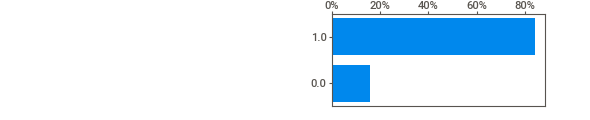
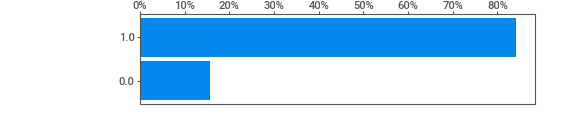
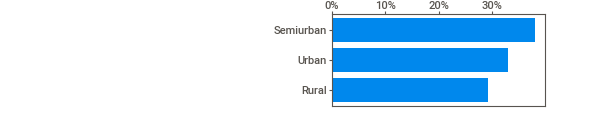
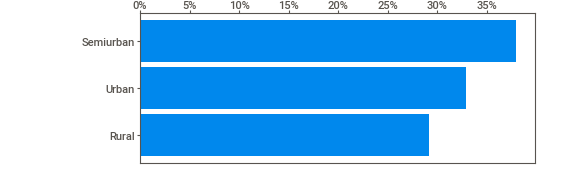
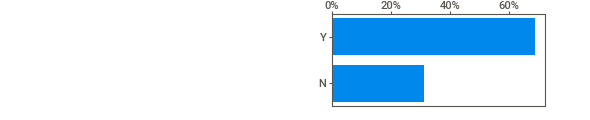
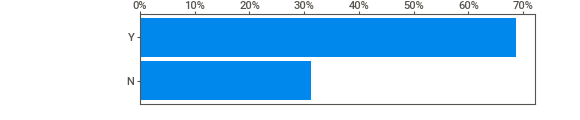
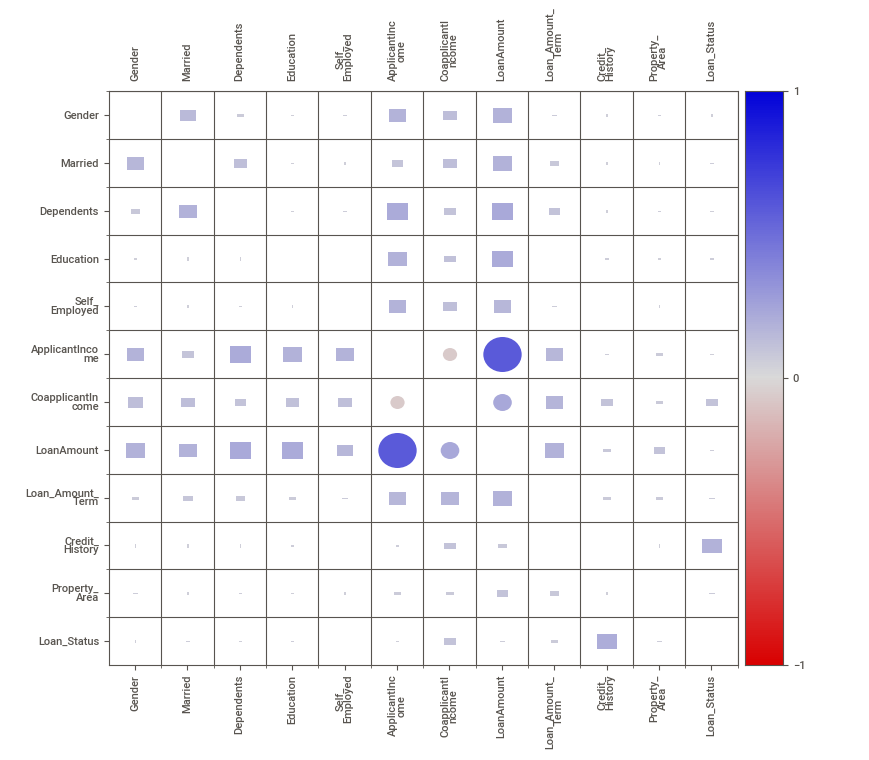
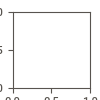

In [10]:
autoEDA = sweetviz.analyze(train_data)
autoEDA.show_notebook()

### Your Own EDA 


Question 1. An overview of the data. (Provide the number of records, fields and their data types. Do for both).

In [9]:
## overview of train dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
## overview of test dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [11]:
## Statistical view of train dataset
train_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614.0,NaN,NaN,NaN,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
CoapplicantIncome,614.0,NaN,NaN,NaN,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,NaN,NaN,NaN,146.412162,85.587325,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,600.0,NaN,NaN,NaN,342.0,65.12041,12.0,360.0,360.0,360.0,480.0


In [12]:
## Statistical view of test dataset
test_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,367,367,LP001015,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,356,2,Male,286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,367,2,Yes,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,357,4,0,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,367,2,Graduate,283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,344,2,No,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,367.0,NaN,NaN,NaN,4805.599455,4910.685399,0.0,2864.0,3786.0,5060.0,72529.0
CoapplicantIncome,367.0,NaN,NaN,NaN,1569.577657,2334.232099,0.0,0.0,1025.0,2430.5,24000.0
LoanAmount,362.0,NaN,NaN,NaN,136.132597,61.366652,28.0,100.25,125.0,158.0,550.0
Loan_Amount_Term,361.0,NaN,NaN,NaN,342.537396,65.156643,6.0,360.0,360.0,360.0,480.0


Question 2. What data quality issues exist in both train and test? (Comment any missing values and duplicates)

In [13]:
## checking duplicate values of train dataset
train_data.duplicated().sum()


0

In [14]:
## checking duplicate values of test dataset
test_data.duplicated().sum()

0

In [15]:
## checking missing values of train dataset
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
## checking missing values of test dataset
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

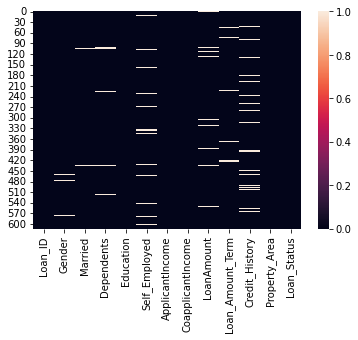

In [17]:
## Visualizing Missing Data of train dataset
sns.heatmap(train_data.isnull())
plt.show()

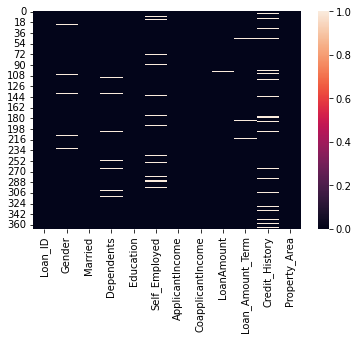

In [18]:
## Visualizing Missing Data of test dataset
sns.heatmap(test_data.isnull())
plt.show()

In [19]:
print("\n ----- Value Counts ----- \n")
print(train_data["Loan_Status"].value_counts())

print("\n ------ Normalize Value ------ \n")
train_data["Loan_Status"].value_counts(normalize=True)


 ----- Value Counts ----- 

Y    422
N    192
Name: Loan_Status, dtype: int64

 ------ Normalize Value ------ 



Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

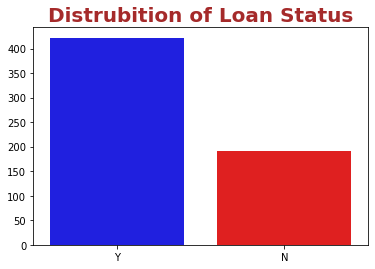

In [20]:
value_counts = [422, 192]
normalize_value = [0.687296, 0.312704]
plt.figure(figsize=(6,4))
sns.barplot(x=["Y", "N"], y=value_counts, palette={"Y": "blue", "N": "red"})
plt.title("Distrubition of Loan Status", fontsize=20, fontweight='bold', color='brown')
plt.show()



Question 4. How do women and men compare when it comes to defaulting on loans in the historical dataset?



In [23]:
print("\n ----- Value Counts ----- \n")
print(train_data["Gender"].value_counts())

print("\n ----- Gender wise Loan Status ----- \n")
train_data.groupby("Gender")["Loan_Status"].value_counts()


 ----- Value Counts ----- 

Male      489
Female    112
Name: Gender, dtype: int64

 ----- Gender wise Loan Status ----- 



Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              339
        N              150
Name: Loan_Status, dtype: int64

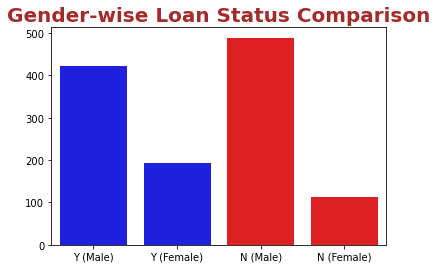

In [24]:
value_counts = [422, 192, 489, 112]
plt.figure(figsize=(6,4))
sns.barplot(x=["Y (Male)", "Y (Female)", "N (Male)", "N (Female)"], y=value_counts, palette={"Y (Male)": "blue", "Y (Female)": "blue", "N (Male)": "red", "N (Female)": "red"})
plt.title("Gender-wise Loan Status Comparison", fontsize=20, fontweight='bold', color='brown')
plt.show()


Question 5.How many of the loan applicants have dependents based on the historical dataset?



In [25]:
train_data[train_data["Dependents"] != "0"].shape[0]

269

In [26]:
train_data[train_data["Dependents"] != '0'].shape[0]/train_data.shape[0]

0.4381107491856677

Question 6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset?



In [27]:
train_data.groupby("Self_Employed")["ApplicantIncome"].describe()

,count,mean,std,min,25%,50%,75%,max
Self_Employed,,,,,,,,
No,500.0,5049.748000,5682.895810,150.0,2824.50,3705.5,5292.75,81000.0
Yes,82.0,7380.817073,5883.564795,674.0,3452.25,5809.0,9348.50,39147.0


Question 7. Are applicants with a credit history more likely to default than those who do not have one?

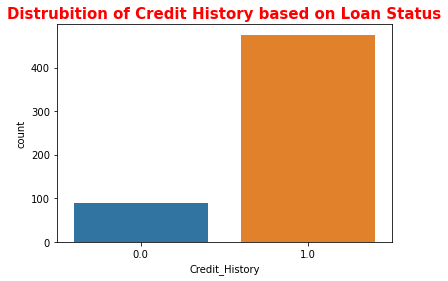


 ----- Value Counts ----- 

1.0    475
0.0     89
Name: Credit_History, dtype: int64

 ---------------------------- 



Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             Y              378
                N               97
Name: Loan_Status, dtype: int64

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x='Credit_History', data=train_data)
plt.title("Distrubition of Credit History based on Loan Status", fontsize=15, fontweight='bold', color='red')
plt.show()

print("\n ----- Value Counts ----- \n")
print(train_data["Credit_History"].value_counts())

print("\n ---------------------------- \n")
train_data.groupby('Credit_History')['Loan_Status'].value_counts()


In [ ]:
value_counts = [475, 89]

plt.figure(figsize=(6,4))
sns.barplot(x=["Y", "N"], y=value_counts, palette={"Y": "blue", "N": "red"})
plt.title("Distrubition of Credit History based on Loan Status", fontsize=20, fontweight='bold', color='brown')
plt.show()

Question 8.Is there a correlation between the applicant's income and the loan amount they applied for?

In [29]:
train_data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


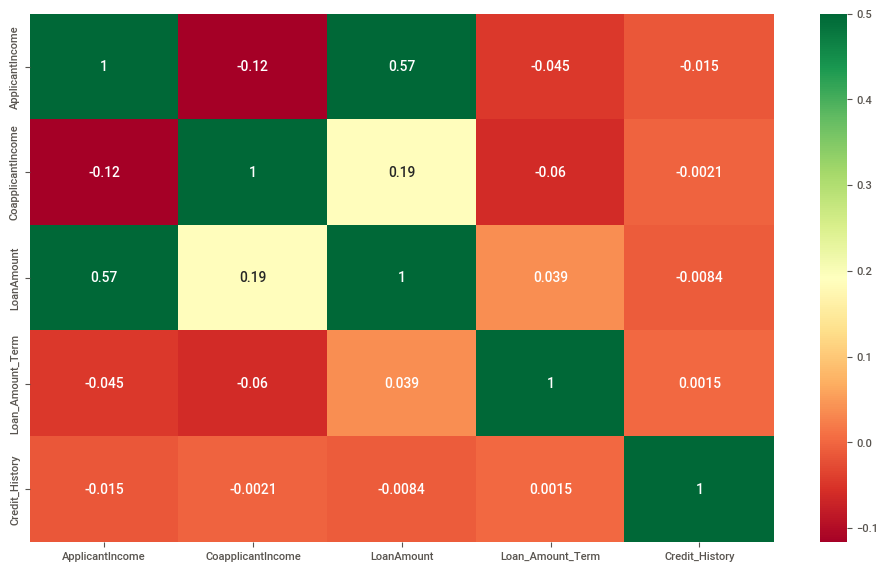

In [30]:
# Correlation Heatmap
plt.figure(figsize=(12,7))
sns.heatmap(train_data.corr(), annot=True, cmap='RdYlGn', vmax=.5)
plt.show()

Answers:-
Q1 - An overview of the data.

Train Data contains 614 Rows and total 13 columns.

Out of 13 columns there are 4 float columns, 1 integer columns and 8 object columns.

Test Data contains 367 Rows and total 12 columns.

And out of 12 columns there are 3 float columns, 2 Integer columns and 7 object columns.

Q2 - What data quality issues exist in both train and test?

There are no duplicate values in both train dataset and test dataset.

But both dataset have some missing values.

Train Dataset: Gender 13, Married 3, Dependents 15, Self_Employed 32, LoanAmount 22, Loan_Amount_Term 14 and Credit_History 50 contains missing values respectively.

Test Dataset: Gender 11, Dependents 10, Self_Employed 23, LoanAmount 5, Loan_Amount_Term 6 and Credit_History 29 contains missing values respectively.

Q3 - How do the loan statuses compare? i.e. what is the distrubition of each?

There are 422 loans with a Yes status, which is the majority, and 192 loans with No status.

Q4 - How do women and men compare when it comes to defaulting on loans in the historical dataset?

Men have a higher loan status of Yes than women do, and same goes to loan status of No.

Q5 - How many of the loan applicants have dependents based on the historical dataset?

According to the historical dataset, 269 loan applicants have dependents.

Q6 - How does the income of those who are employed compare to those who are self-employed based on the historical dataset?

The average income of those who are employed is 5049 which is low compared to self-employed that is 7380.
The minimum income of those who are employed is 150 which is low compared to self-employed that is 674.
But the maximum income of those who are employed is 81000 which is high compared to self-employed that is 39147.
Additionally, 500 people are employed, which is a large number when compared to the 82 people who were self-employed in the historical dataset.

Q7 - Are applicants with a credit history more likely to default than those who do not have one?

Indeed, candidates with credit histories may be more likely to default than those without them.

Q8 - Is there a correlation between the applicant's income and the loan amount they applied for?

Yes, there is a correlation between the applicant's income and the loan amount they applied for.

# Part Two

## Auto ML wth autosklearn


In [31]:
pip install autosklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement autosklearn (from versions: none)
ERROR: No matching distribution found for autosklearn


In [32]:
import autosklearn.classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [33]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
### Matrix of features

X = train_data[['Gender',
'Married',
'Dependents',
'Education',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History',
'Property_Area']]

### convert string(text) to categorical
X['Gender'] = X['Gender'].astype('category')
X['Married'] = X['Married'].astype('category')
X['Education'] = X['Education'].astype('category')
X['Dependents'] = X['Dependents'].astype('category')
X['Self_Employed'] = X['Self_Employed'].astype('category')
X['Property_Area'] = X['Property_Area'].astype('category')


### label encode target
y = train_data['Loan_Status'].map({'N':0,'Y':1}).astype(int)


### train-test split
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-34-f1ad45d74fc6>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = X['Gender'].astype('category')
<ipython-input-34-f1ad45d74fc6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Married'] = X['Married'].astype('category')
<ipython-input-34-f1ad45d74fc6>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [35]:
#train
autoML = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=2*30, per_run_time_limit=30, n_jobs=8)
autoML.fit(X_train, y_train)

# predict
predictions_autoML = autoML.predict(X_test)

In [36]:
print('Model Accuracy:', accuracy_score(predictions_autoML, y_test))

Model Accuracy: 0.7886178861788617


In [37]:
print(confusion_matrix(predictions_autoML, y_test))

[[18  1]
 [25 79]]


In [38]:
print(classification_report(predictions_autoML, y_test))

              precision    recall  f1-score   support

           0       0.42      0.95      0.58        19
           1       0.99      0.76      0.86       104

    accuracy                           0.79       123
   macro avg       0.70      0.85      0.72       123
weighted avg       0.90      0.79      0.82       123



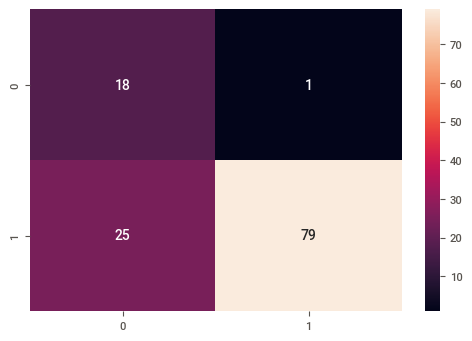

In [39]:
con_mat = confusion_matrix(predictions_autoML, y_test)

sns.heatmap(con_mat, annot=True)
plt.show()

## Bespoke ML sklearn

### Data Preparation

In [40]:
# Matrix of features

df = train_data[['Education',
'Property_Area']]

### Include Numerical Features Here ###
### Handle Missing Values Here ###
### Scale Here ###


# label encode target
y = train_data['Loan_Status'].map({'N':0,'Y':1}).astype(int)

# # encode with get dummies
X = pd.DataFrame(df, columns=df.columns)
X = pd.get_dummies(X, drop_first=True)

# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
import sklearn
import scipy

In [42]:
# some classifiers you can pick from (remember to import)

classifiers = sklearn.utils.all_estimators(type_filter=None)
for name, class_ in classifiers:
    if hasattr(class_, 'predict_proba'):
        print(name)

AdaBoostClassifier
BaggingClassifier
BayesianGaussianMixture
BernoulliNB
CalibratedClassifierCV
CategoricalNB
ClassifierChain
ComplementNB
DecisionTreeClassifier
DummyClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianMixture
GaussianNB
GaussianProcessClassifier
GradientBoostingClassifier
GridSearchCV
HistGradientBoostingClassifier
KNeighborsClassifier
LabelPropagation
LabelSpreading
LinearDiscriminantAnalysis
LogisticRegression
LogisticRegressionCV
MLPClassifier
MultiOutputClassifier
MultinomialNB
NuSVC
OneVsRestClassifier
Pipeline
QuadraticDiscriminantAnalysis
RFE
RFECV
RadiusNeighborsClassifier
RandomForestClassifier
RandomizedSearchCV
SGDClassifier
SVC
SelfTrainingClassifier
StackingClassifier
VotingClassifier


In [43]:
# train
clf = LogisticRegression() #change model here
clf.fit(X_train, y_train)

# predict
predictions_clf = clf.predict(X_test)

In [44]:
print('Model Accuracy:', accuracy_score(predictions_clf, y_test))

Model Accuracy: 0.6504065040650406


In [45]:
print(confusion_matrix(predictions_clf, y_test))

[[ 0  0]
 [43 80]]


In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
# Matrix of features

df = train_data[['Gender',
'Married',
'Education',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History']]


# imputing the missing values:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

# encoding categorical features
df['Gender'] = df['Gender'].map({'Male':0,'Female':1}).astype(int)
df['Married'] = df['Married'].map({'No':0,'Yes':1}).astype(int)
df['Education'] = df['Education'].map({'Not Graduate':0,'Graduate':1}).astype(int)
df['Self_Employed'] = df['Self_Employed'].map({'No':0,'Yes':1}).astype(int)
df['Credit_History'] = df['Credit_History'].astype(int)


df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace = True)
 
X = df.copy()

# label encode target
y = train_data['Loan_Status'].map({'N':0,'Y':1}).astype(int)


# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
# train
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() #change model here
clf.fit(X_train, y_train)

# predict
predictions_clf = clf.predict(X_test)

In [49]:
print('Model Accuracy:', accuracy_score(predictions_clf, y_test))

Model Accuracy: 0.7804878048780488


In [50]:
print(confusion_matrix(predictions_clf, y_test))

[[19  3]
 [24 77]]


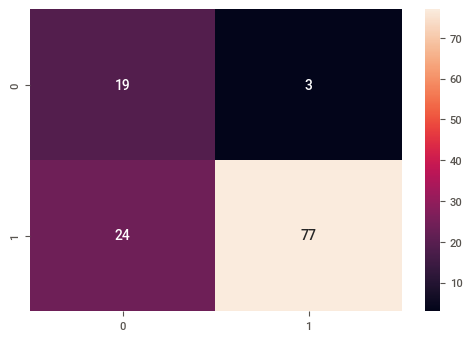

In [51]:
cm = confusion_matrix(predictions_clf, y_test)
sns.heatmap(cm, annot=True)
plt.show()

ROC - AUC

In [52]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(predictions_clf, y_test)
print("AUC score is ", auc)

AUC score is  0.8130063006300631


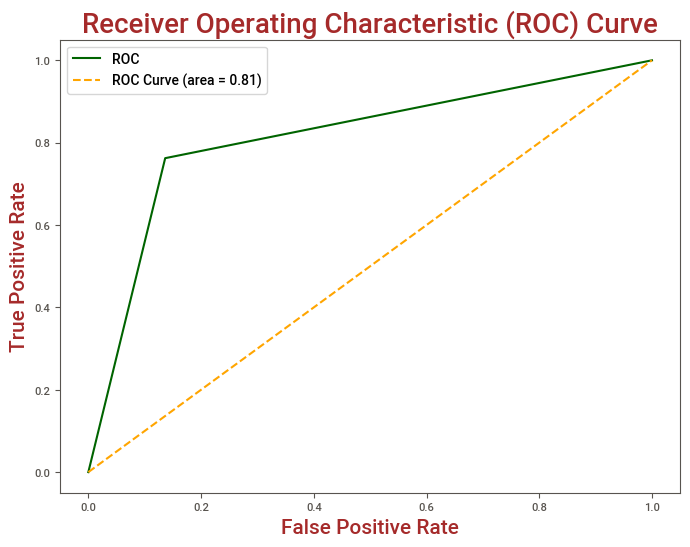

In [53]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(predictions_clf, y_test)

plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, color="darkgreen", label="ROC")
plt.plot([0, 1], [0, 1], color="orange", linestyle="--", label="ROC Curve (area = %0.2f)" % auc)

plt.xlabel("False Positive Rate", fontsize=15, fontweight="bold", color="brown")
plt.ylabel("True Positive Rate", fontsize=15, fontweight="bold", color="brown")
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=20, fontweight="bold", color="brown")
plt.legend()

plt.show()

K-Fold Cross Validation

In [54]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = "accuracy")

print("Cross-Validation score:{}".format(scores))


Cross-Validation score:[0.82828283 0.73469388 0.75510204 0.78571429 0.82653061]


In [55]:
# compute Average cross-validation score
#the cross-validation accuracy by calculating its mean
print("Average cross-validation score: {:.4f}".format(scores.mean()))

Average cross-validation score: 0.7861
